# Speed profile

In [2]:
T = 0.05 # Sampling time (time step)

## Mild Driver

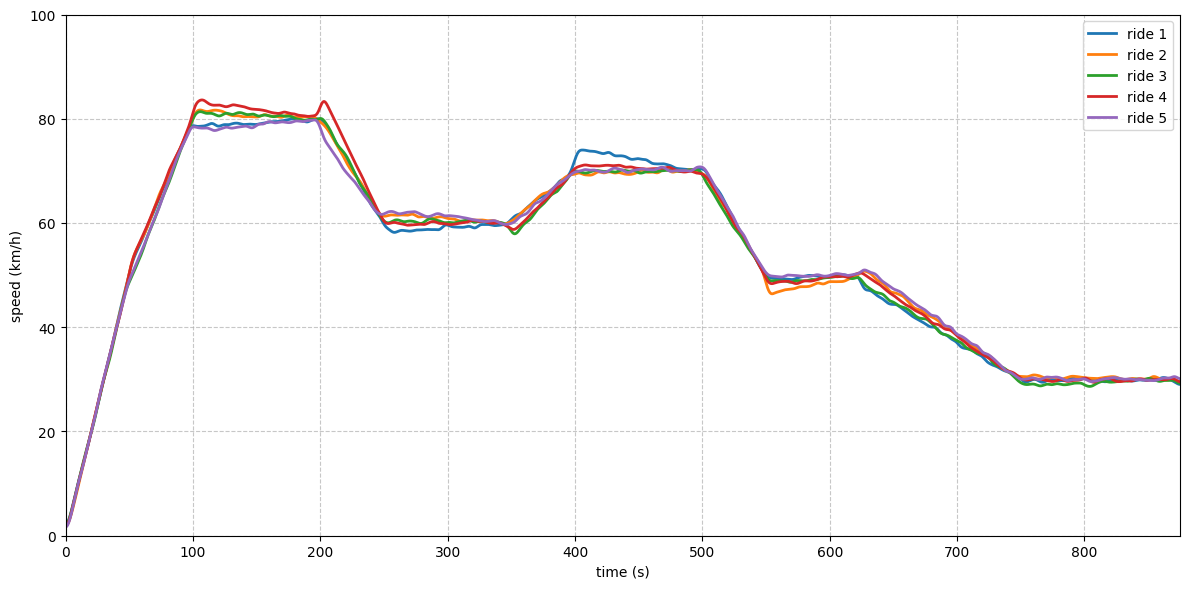

In [4]:
import numpy as np
from scipy.ndimage import gaussian_filter1d
import matplotlib.pyplot as plt
import pandas as pd

def generate_ride_data(ride_number, num_points=17500):
    # Generate distance points
    max_distance = 17500
    distances = np.linspace(0, max_distance, num_points)
    
    # Initialize speeds array
    speeds = np.zeros(num_points)
    
    # Define speed levels and their transition points
    # Format: (start_distance, end_distance, target_speed)
    speed_profile = [
        (0, 1000, 50),          # Initial acceleration
        (1000, 2000, 80),      # Acceleration to high speed
        (2000, 4000, 80),      # Maintain speed
        (4000, 5000, 60),      # Slight deceleration
        (5000, 7000, 60),      # Maintain speed
        (7000, 8000, 70),      # Acceleration
        (8000, 10000, 70),     # Maintain speed
        (10000, 11000, 50),    # Deceleration
        (11000, 12500, 50),    # Maintain speed
        (12500, 15000, 30),     # Final deceleration
        (15000, 17500, 30)      # Final slow segment
    ]
    
    # Generate speed profile
    for start_dist, end_dist, target_speed in speed_profile:
        mask = (distances >= start_dist) & (distances < end_dist)
        if "Maintain" in f"{target_speed}":  # For constant speed sections
            speeds[mask] = target_speed + np.random.normal(0, 2, np.sum(mask))
        else:  # For acceleration/deceleration sections
            section_distances = distances[mask] - start_dist
            progress = section_distances / (end_dist - start_dist)
            prev_speed = speeds[max(0, np.where(mask)[0][0] - 1)]
            speeds[mask] = prev_speed + (target_speed - prev_speed) * progress
            speeds[mask] += np.random.normal(0, 2, np.sum(mask))
    
    # Add small random variations specific to each ride
    speeds += np.random.normal(0, 2, num_points)
    
    # Apply Gaussian smoothing for transitions
    speeds = gaussian_filter1d(speeds, sigma=50)
    
    # Ensure no negative speeds
    speeds = np.maximum(speeds, 0)
    
    return distances, speeds

# Set random seed for reproducibility
np.random.seed(42)

# Create figure and axis
plt.figure(figsize=(12, 6))

# Generate and plot data for 5 rides
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
for i in range(5):
    distances, speeds = generate_ride_data(i)
    plt.plot(distances*T, speeds, label=f'ride {i+1}', color=colors[i], linewidth=2)

    # Create DataFrame from the two arrays
    df = pd.DataFrame({
        'time': distances*T,
        'speed': speeds
    })

    # Save to CSV
    df.to_csv('speed_data_mild_driver'+str(i+1)+'.csv', index=False)

# Customize the plot
plt.xlabel('time (s)')
plt.ylabel('speed (km/h)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Set axis limits
plt.xlim(0, 17500*T)
plt.ylim(0, 100)

# Show the plot
plt.tight_layout()
plt.show()

# If you want to get the raw data:
def get_ride_data(num_rides=5):
    all_rides = []
    for i in range(num_rides):
        distances, speeds = generate_ride_data(i)
        all_rides.append({
            'distances': distances.tolist(),
            'speeds': speeds.tolist()
        })
    return all_rides

## Aggressive Driver

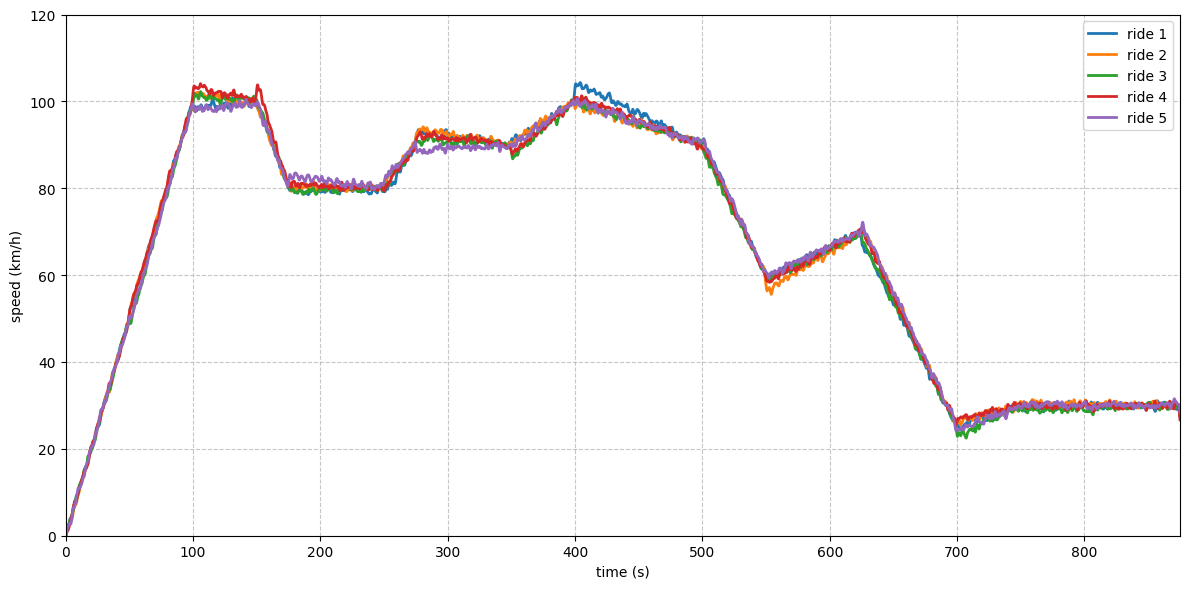

In [8]:
import numpy as np
from scipy.ndimage import gaussian_filter1d
import matplotlib.pyplot as plt

def generate_ride_data(ride_number, num_points=17500):
    # Generate distance points
    max_distance = 17500
    distances = np.linspace(0, max_distance, num_points)
    
    # Initialize speeds array
    speeds = np.zeros(num_points)
    
    # Define speed levels and their transition points
    # Format: (start_distance, end_distance, target_speed)
    speed_profile = [
        (0, 1000, 50),          # Initial acceleration
        (1000, 2000, 100),      # Acceleration to high speed
        (2000, 3000, 100),      # Maintain speed
        (3000, 3500, 80),      # Slight deceleration
        (3500, 5000, 80),      # Maintain speed
        (5000, 5500, 90),      # Slight acceleration
        (5500, 7000, 90),      # Maintain speed
        (7000, 8000, 100),      # Acceleration
        (8000, 10000, 90),     # Maintain speed
        (10000, 11000, 60),    # Deceleration
        (11000, 12500, 70),    # Maintain speed
        (12500, 14000, 25),     # Big deceleration
        (14000, 15000, 30),     # Final deceleration
        (15000, 17500, 30)      # Final slow segment
    ]
    
    # Generate speed profile
    for start_dist, end_dist, target_speed in speed_profile:
        mask = (distances >= start_dist) & (distances < end_dist)
        if "Maintain" in f"{target_speed}":  # For constant speed sections
            speeds[mask] = target_speed + np.random.normal(0, 2, np.sum(mask))
        else:  # For acceleration/deceleration sections
            section_distances = distances[mask] - start_dist
            progress = section_distances / (end_dist - start_dist)
            prev_speed = speeds[max(0, np.where(mask)[0][0] - 1)]
            speeds[mask] = prev_speed + (target_speed - prev_speed) * progress
            speeds[mask] += np.random.normal(0, 2, np.sum(mask))
    
    # Add small random variations specific to each ride
    speeds += np.random.normal(0, 2, num_points)
    
    # Apply Gaussian smoothing for transitions
    speeds = gaussian_filter1d(speeds, sigma=10)
    
    # Ensure no negative speeds
    speeds = np.maximum(speeds, 0)
    
    return distances, speeds

# Set random seed for reproducibility
np.random.seed(42)

# Create figure and axis
plt.figure(figsize=(12, 6))

# Generate and plot data for 5 rides
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
for i in range(5):
    distances, speeds = generate_ride_data(i)
    plt.plot(distances*T, speeds, label=f'ride {i+1}', color=colors[i], linewidth=2)

    # Create DataFrame from the two arrays
    df = pd.DataFrame({
        'time': distances*T,
        'speed': speeds
    })

    # Save to CSV
    df.to_csv('speed_data_aggressive_driver'+str(i+1)+'.csv', index=False)


# Customize the plot
plt.xlabel('time (s)')
plt.ylabel('speed (km/h)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Set axis limits
plt.xlim(0, 17500*T)
plt.ylim(0, 120)

# Show the plot
plt.tight_layout()
plt.show()

# If you want to get the raw data:
def get_ride_data(num_rides=5):
    all_rides = []
    for i in range(num_rides):
        distances, speeds = generate_ride_data(i)
        all_rides.append({
            'distances': distances.tolist(),
            'speeds': speeds.tolist()
        })
    return all_rides

In [7]:
print(distances[-1])


17500.0
